# Market Data Exercise

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\numpy\.libs\libopenblas.gk7gx5keq4f6uyo3p26ulgbqyhgqo7j4.gfortran-win_amd64.dll
C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
In C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support

## Data Prep

In [2]:
# read and process the charts dataset
charts_df = pd.read_csv('data/spotify_daily_charts.csv')
#transform date column into a datetime column
charts_df['date'] = pd.to_datetime(charts_df['date'])
charts_df.head()

,date,position,track_id,track_name,artist,streams
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656


In [3]:
# read and process the tracks dataset
tracks_df = pd.read_csv('data/spotify_daily_charts_tracks.csv')
tracks_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,2016-11-17,76,0.578,0.574,2.0,-6.209,1.0,0.0454,0.196,0.00000,0.0830,0.301,174.152
1,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,2016-10-28,85,0.358,0.557,10.0,-7.398,1.0,0.0590,0.695,0.00000,0.0902,0.494,85.043
2,7BKLCZ1jbUBVqRi2FVlTVw,Closer,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,2016-07-29,85,0.748,0.524,8.0,-5.599,1.0,0.0338,0.414,0.00000,0.1110,0.661,95.010
3,2rizacJSyD9S1IQUxUxnsK,All We Know,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,2016-09-29,69,0.662,0.586,0.0,-8.821,1.0,0.0307,0.097,0.00272,0.1150,0.296,90.000
4,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,2016-10-11,0,0.783,0.623,7.0,-6.126,1.0,0.0800,0.338,0.00000,0.0975,0.447,100.048


In [4]:
#merge the charts and tracks dataset
df = charts_df.merge(tracks_df, on='track_id', how='left')
#
df = df.drop(columns='track_name_y')
df = df.rename(columns={'track_name_x':'track_name'})
df.head()

,date,position,track_id,track_name,artist,streams,artist_id,artist_name,album_id,duration,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,...,0.574,2.0,-6.209,1.0,0.0454,0.196,0.00000,0.0830,0.301,174.152
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,...,0.557,10.0,-7.398,1.0,0.0590,0.695,0.00000,0.0902,0.494,85.043
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,...,0.524,8.0,-5.599,1.0,0.0338,0.414,0.00000,0.1110,0.661,95.010
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,...,0.586,0.0,-8.821,1.0,0.0307,0.097,0.00272,0.1150,0.296,90.000
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,...,0.623,7.0,-6.126,1.0,0.0800,0.338,0.00000,0.0975,0.447,100.048


### Load the Artists csv

In [5]:
# already in the spotify_daily_charts_artists.csv
df_artists = pd.read_csv("data/spotify_daily_charts_artists.csv")
df_artists.head()

,artist_id,artist_name,total_followers,genres,popularity
0,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,30585244,"['dance pop', 'pop']",95
1,4IWBUUAFIplrNtaOHcJPRM,James Arthur,8035001,"['pop', 'post-teen pop', 'talent show', 'uk pop']",87
2,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,17865117,"['dance pop', 'edm', 'electropop', 'pop', 'pop...",86
3,04gDigrS5kc9YWfZHwBETP,Maroon 5,30759087,"['pop', 'pop rock']",92
4,5p7f24Rk5HkUZsaS3BLG5F,Hailee Steinfeld,6760239,"['dance pop', 'pop', 'post-teen pop']",79


In [6]:
#merge the df dataset with df_artists
df_with_genres = df.merge(df_artists, on='artist_id', how='left')
df_with_genres.columns.sort_values()


Index(['acousticness', 'album_id', 'artist', 'artist_id', 'artist_name_x',
       'artist_name_y', 'danceability', 'date', 'duration', 'energy', 'genres',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'popularity_x', 'popularity_y', 'position', 'release_date',
       'speechiness', 'streams', 'tempo', 'total_followers', 'track_id',
       'track_name', 'valence'],
      dtype='object')

In [7]:
df_with_genres.drop(columns=['artist_name_y','popularity_y'],inplace=True)
df_with_genres.columns.sort_values()

Index(['acousticness', 'album_id', 'artist', 'artist_id', 'artist_name_x',
       'danceability', 'date', 'duration', 'energy', 'genres',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'popularity_x', 'position', 'release_date', 'speechiness', 'streams',
       'tempo', 'total_followers', 'track_id', 'track_name', 'valence'],
      dtype='object')

In [8]:
df_with_genres = df_with_genres.rename(columns={'artist_name_x':'artist_name'})
df_with_genres.columns.sort_values()

Index(['acousticness', 'album_id', 'artist', 'artist_id', 'artist_name',
       'danceability', 'date', 'duration', 'energy', 'genres',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'popularity_x', 'position', 'release_date', 'speechiness', 'streams',
       'tempo', 'total_followers', 'track_id', 'track_name', 'valence'],
      dtype='object')

In [9]:
df_with_genres = df_with_genres.rename(columns={'popularity_x':'popularity'})
df_with_genres.columns.sort_values()

Index(['acousticness', 'album_id', 'artist', 'artist_id', 'artist_name',
       'danceability', 'date', 'duration', 'energy', 'genres',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity',
       'position', 'release_date', 'speechiness', 'streams', 'tempo',
       'total_followers', 'track_id', 'track_name', 'valence'],
      dtype='object')

### Save with genres

In [10]:
# Run only ones
#df_with_genres.to_csv("data/spotify_combined_with_genres.csv", index=False)

In [11]:
df_with_genres.head()

,date,position,track_id,track_name,artist,streams,artist_id,artist_name,album_id,duration,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,total_followers,genres
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,...,-6.209,1.0,0.0454,0.196,0.00000,0.0830,0.301,174.152,30585244,"['dance pop', 'pop']"
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,...,-7.398,1.0,0.0590,0.695,0.00000,0.0902,0.494,85.043,8035001,"['pop', 'post-teen pop', 'talent show', 'uk pop']"
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,...,-5.599,1.0,0.0338,0.414,0.00000,0.1110,0.661,95.010,17865117,"['dance pop', 'edm', 'electropop', 'pop', 'pop..."
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,...,-8.821,1.0,0.0307,0.097,0.00272,0.1150,0.296,90.000,17865117,"['dance pop', 'edm', 'electropop', 'pop', 'pop..."
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,...,-6.126,1.0,0.0800,0.338,0.00000,0.0975,0.447,100.048,30759087,"['pop', 'pop rock']"


In [12]:
df_with_genres.isnull().sum()

date                 0
position             0
track_id             0
track_name          20
artist              20
streams              0
artist_id            0
artist_name         20
album_id             0
duration             0
release_date         0
popularity           0
danceability        63
energy              63
key                 63
loudness            63
mode                63
speechiness         63
acousticness        63
instrumentalness    63
liveness            63
valence             63
tempo               63
total_followers      0
genres               0
dtype: int64

In [13]:
df.isnull().sum()

date                 0
position             0
track_id             0
track_name          10
artist              10
streams              0
artist_id            0
artist_name         10
album_id             0
duration             0
release_date         0
popularity           0
danceability        63
energy              63
key                 63
loudness            63
mode                63
speechiness         63
acousticness        63
instrumentalness    63
liveness            63
valence             63
tempo               63
dtype: int64

In [14]:
## Overwrite df
df = df_with_genres.copy()

In [15]:
df['date'] = pd.to_datetime(df['date'])

## Instructions

1. (*Easy- Individual Work*) Among those included in the Spotify charts, pick 1 artist you like to analyze. 

   a. Plot the streams and positions of their top 5 streamed songs.

   b. Compare these charts with streams and positions of what you feel to be a possible collaborator/competitor/related artist. 

   What insights can you draw from the data?

In [16]:
df['date'] = pd.to_datetime(df['date'])

In [17]:
df.set_index('date',inplace=True)

In [18]:
artist_selected="Bruno Mars"

In [19]:
artist1_df = df[ (df['artist']==artist_selected) & (df['position']<=5) ]

In [20]:
artist1_df[(artist1_df['position']<=5)][['track_name']].value_counts()

track_name                    
Versace on the Floor              120
That's What I Like                119
Leave The Door Open                76
Finesse - Remix; feat. Cardi B     10
24K Magic                           1
dtype: int64

In [21]:
artist1_df.groupby(['track_name'])['streams'].sum().sort_values(ascending=False).to_frame()

,streams
track_name,
Versace on the Floor,27768215
That's What I Like,24085359
Leave The Door Open,18547817
Finesse - Remix; feat. Cardi B,1416596
24K Magic,150963


Text(0.5, 1.0, 'Cumulative Total Streams')

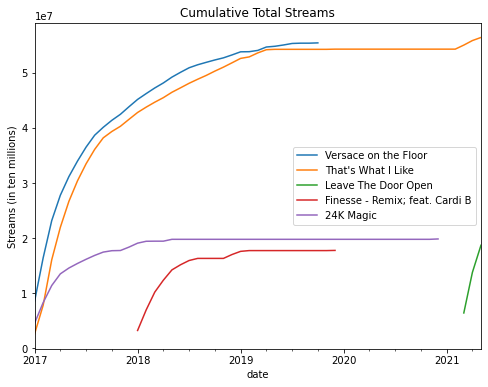

In [22]:
# Code for Part 1 here



#
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

data1 = df[df['track_name']=="Versace on the Floor"]['streams'].resample('M').sum().cumsum()
data2 = df[df['track_name']=="That's What I Like"]['streams'].resample('M').sum().cumsum()
data3 = df[df['track_name']=="Leave The Door Open"]['streams'].resample('M').sum().cumsum()
data4 = df[df['track_name']=="Finesse - Remix; feat. Cardi B"]['streams'].resample('M').sum().cumsum()
data5 = df[df['track_name']=="24K Magic"]['streams'].resample('M').sum().cumsum()

data1.plot(ax=ax, label="Versace on the Floor")
data2.plot(ax=ax, label="That's What I Like")
data3.plot(ax=ax, label="Leave The Door Open")
data4.plot(ax=ax, label="Finesse - Remix; feat. Cardi B")
data5.plot(ax=ax, label="24K Magic")

plt.legend(["Versace on the Floor","That's What I Like","Leave The Door Open","Finesse - Remix; feat. Cardi B","24K Magic"])
plt.ylabel('Streams (in ten millions)')
plt.title('Cumulative Total Streams')


Text(0.5, 1.0, 'Cumulative Total Streams')

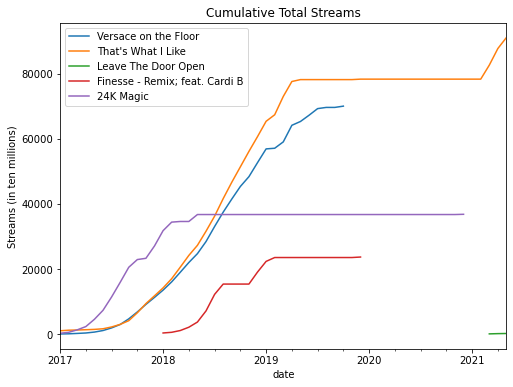

In [23]:

#
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

data1 = df[df['track_name']=="Versace on the Floor"]['position'].resample('M').sum().cumsum()
data2 = df[df['track_name']=="That's What I Like"]['position'].resample('M').sum().cumsum()
data3 = df[df['track_name']=="Leave The Door Open"]['position'].resample('M').sum().cumsum()
data4 = df[df['track_name']=="Finesse - Remix; feat. Cardi B"]['position'].resample('M').sum().cumsum()
data5 = df[df['track_name']=="24K Magic"]['position'].resample('M').sum().cumsum()

data1.plot(ax=ax, label="Versace on the Floor")
data2.plot(ax=ax, label="That's What I Like")
data3.plot(ax=ax, label="Leave The Door Open")
data4.plot(ax=ax, label="Finesse - Remix; feat. Cardi B")
data5.plot(ax=ax, label="24K Magic")

plt.legend(["Versace on the Floor","That's What I Like","Leave The Door Open","Finesse - Remix; feat. Cardi B","24K Magic"])
plt.ylabel('Streams (in ten millions)')
plt.title('Cumulative Total Streams')


2. (*Intermediate - Group Work*) A song may be classified as follows:

   - **Mainstay** - Song with high streams ($>X_1$ streams) and position ($>P_1$ position) all throughout the year
   - **Viral** - Song that reach the peak position fast with high increase in streams ($>X_2$ streams/day),
     followed by a rapid decline in position ($P_2$ places/day) and streams ($>X_3$ streams/day)
   - **Seasonal** - Song that garner considerable streams ($>X_4$ streams) within a certain season and go into low ranks/ disappear from the chart after the season
    
   a. Discuss among your group how you would define and set values to the thresholds that you will use to classify the songs according to the categories as described above. (You may add more thresholds to refine the definitions, as you see fit)
   
   b. Using your group's definition in (a) name as many songs as you can per classification and plot their streams and position as a time series.

In [24]:
# Mainstay
# Mainstay - Song with high streams ( >𝑋1  streams) and position ( >𝑃1  position) all throughout the year
#getting mainstay streams
X1 = df.groupby(['track_id','track_name'])[['streams','position']].agg(streams=('streams', sum), position=('position', min)).sort_values(['streams','position'], ascending=[False,True])
X1['streams'].quantile(0.75)

#Mainstay - Will refer to songs equal to or above the upper quantile (Q3). X1 = 3,597,481.75 P1 = 50

3357416.25

In [25]:
X1

,,streams,position
track_id,track_name,,
3WUEs51GpcvlgU7lehLgLh,Kathang Isip,137574061,2
2BgD4nRyx9EZ5o8YEnjRSV,Kung 'Di Rin Lang Ikaw,124246178,1
1yDiru08Q6omDOGkZMPnei,Maybe The Night,117216219,1
1X4l4i472kW5ofFP8Xo0x0,Sana,116625610,1
5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,115333908,2
...,...,...,...
6hmhG1b4LEyNuashVvuIAo,Never Forget You,12343,162
7nD9nN3jord9wWcfW3Gkcm,All In My Head (Flex) (feat. Fetty Wap),11300,191
7x5xYW5W42OGPAdHUyyguy,Locked Away (feat. Adam Levine),11209,194


In [26]:
#getting mainstay -- positions
P1 = df.groupby(['track_id','track_name'])[['streams','position']].agg(streams=('streams', sum), position=('position', min)).sort_values(['streams','position'], ascending=[False,True])
P1['position'].quantile(0.25)

39.0

In [27]:
P1

,,streams,position
track_id,track_name,,
3WUEs51GpcvlgU7lehLgLh,Kathang Isip,137574061,2
2BgD4nRyx9EZ5o8YEnjRSV,Kung 'Di Rin Lang Ikaw,124246178,1
1yDiru08Q6omDOGkZMPnei,Maybe The Night,117216219,1
1X4l4i472kW5ofFP8Xo0x0,Sana,116625610,1
5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,115333908,2
...,...,...,...
6hmhG1b4LEyNuashVvuIAo,Never Forget You,12343,162
7nD9nN3jord9wWcfW3Gkcm,All In My Head (Flex) (feat. Fetty Wap),11300,191
7x5xYW5W42OGPAdHUyyguy,Locked Away (feat. Adam Levine),11209,194


In [28]:
# Viral


In [29]:
# Seasonal


3. (*Advanced - Individual, Optional*) What percentage of Spotify charts streams from 2018-2020 are from mainstay songs? viral songs? seasonal songs? songs that do not belong in any of these categories? What does this reveal about the streaming market?

In [30]:
# Code for Part 3 here


## Sprint EDA

C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


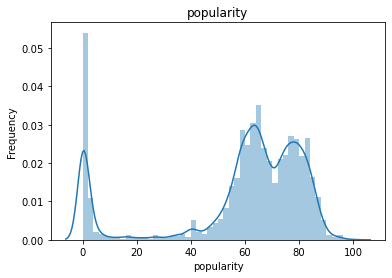

C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


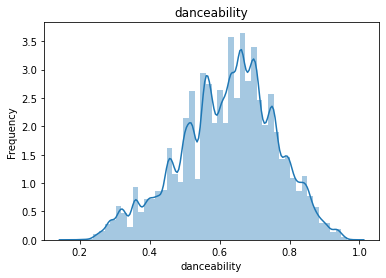

C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


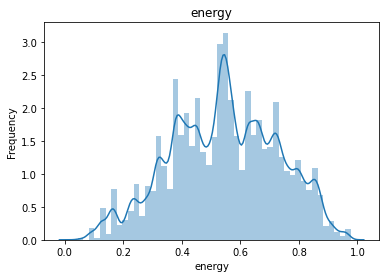

C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


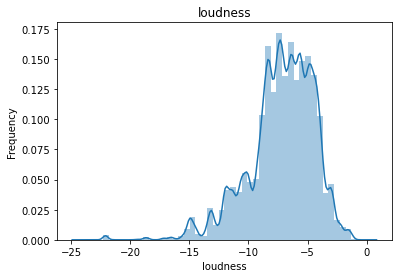

C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


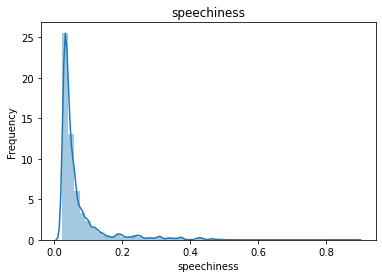

C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


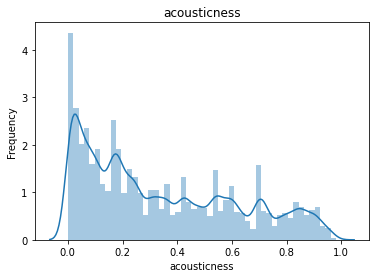

C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


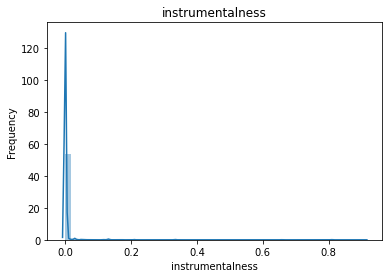

C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


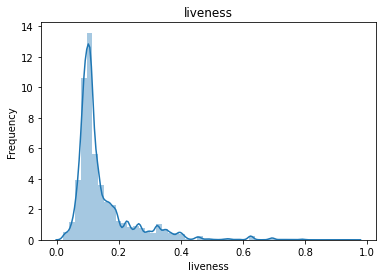

C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


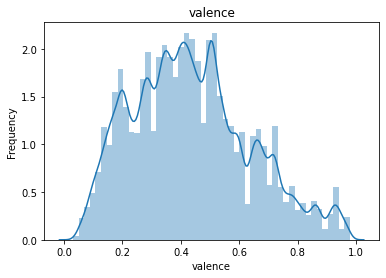

C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


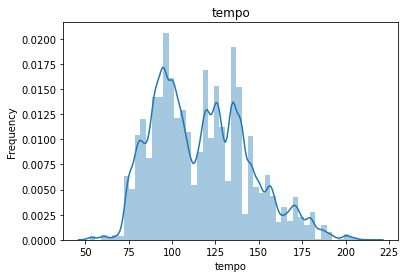

In [31]:
# Visualize histograms of each song metric
for col in ['popularity', 'danceability', 'energy','loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']:
    sns.distplot(df[col])
    plt.title(col)
    plt.ylabel('Frequency')
    plt.show()

### Sprint Artists -- selection

In [32]:
df.columns.sort_values()

Index(['acousticness', 'album_id', 'artist', 'artist_id', 'artist_name',
       'danceability', 'duration', 'energy', 'genres', 'instrumentalness',
       'key', 'liveness', 'loudness', 'mode', 'popularity', 'position',
       'release_date', 'speechiness', 'streams', 'tempo', 'total_followers',
       'track_id', 'track_name', 'valence'],
      dtype='object')

In [33]:
df.head()

,position,track_id,track_name,artist,streams,artist_id,artist_name,album_id,duration,release_date,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,total_followers,genres
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,2016-11-17,...,-6.209,1.0,0.0454,0.196,0.00000,0.0830,0.301,174.152,30585244,"['dance pop', 'pop']"
2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,2016-10-28,...,-7.398,1.0,0.0590,0.695,0.00000,0.0902,0.494,85.043,8035001,"['pop', 'post-teen pop', 'talent show', 'uk pop']"
2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,2016-07-29,...,-5.599,1.0,0.0338,0.414,0.00000,0.1110,0.661,95.010,17865117,"['dance pop', 'edm', 'electropop', 'pop', 'pop..."
2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,2016-09-29,...,-8.821,1.0,0.0307,0.097,0.00272,0.1150,0.296,90.000,17865117,"['dance pop', 'edm', 'electropop', 'pop', 'pop..."
2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,2016-10-11,...,-6.126,1.0,0.0800,0.338,0.00000,0.0975,0.447,100.048,30759087,"['pop', 'pop rock']"


### Hitmaker: Britney Spears

In [34]:
# from Heide
britney_df = df[df['artist_name']=='Britney Spears']
britney_df



,position,track_id,track_name,artist,streams,artist_id,artist_name,album_id,duration,release_date,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,total_followers,genres
date,,,,,,,,,,,,,,,,,,,,,
2017-12-23,145,7aiVBCp1ibIWE5GeHkbtxr,My Only Wish (This Year),Britney Spears,22423,26dSoYclwsYLMAKD3tpOr4,Britney Spears,3O8cHCGgo6phxKJD6j1jnt,255733,2000-11-07,...,-3.777,1.0,0.0273,0.171,0.0,0.225,0.665,147.073,9047930,"['dance pop', 'pop', 'post-teen pop']"
2017-12-24,76,7aiVBCp1ibIWE5GeHkbtxr,My Only Wish (This Year),Britney Spears,47565,26dSoYclwsYLMAKD3tpOr4,Britney Spears,3O8cHCGgo6phxKJD6j1jnt,255733,2000-11-07,...,-3.777,1.0,0.0273,0.171,0.0,0.225,0.665,147.073,9047930,"['dance pop', 'pop', 'post-teen pop']"
2017-12-25,110,7aiVBCp1ibIWE5GeHkbtxr,My Only Wish (This Year),Britney Spears,23086,26dSoYclwsYLMAKD3tpOr4,Britney Spears,3O8cHCGgo6phxKJD6j1jnt,255733,2000-11-07,...,-3.777,1.0,0.0273,0.171,0.0,0.225,0.665,147.073,9047930,"['dance pop', 'pop', 'post-teen pop']"
2018-12-24,82,1UQbxSOVbauPxaUh337GTx,My Only Wish (This Year),Britney Spears,50537,26dSoYclwsYLMAKD3tpOr4,Britney Spears,6moGdK0u39XA2UGFrQNml8,255120,2012-11-16,...,-7.399,1.0,0.0277,0.216,0.0,0.235,0.669,147.077,9047930,"['dance pop', 'pop', 'post-teen pop']"
2018-12-25,129,1UQbxSOVbauPxaUh337GTx,My Only Wish (This Year),Britney Spears,24939,26dSoYclwsYLMAKD3tpOr4,Britney Spears,6moGdK0u39XA2UGFrQNml8,255120,2012-11-16,...,-7.399,1.0,0.0277,0.216,0.0,0.235,0.669,147.077,9047930,"['dance pop', 'pop', 'post-teen pop']"
2019-12-24,85,6id0KJ3XgvJLSzyMtHBj67,My Only Wish (This Year),Britney Spears,54091,26dSoYclwsYLMAKD3tpOr4,Britney Spears,1hQ9IQJHI5F4LxzdCyR38r,257026,2019-11-13,...,-4.743,1.0,0.0267,0.175,0.0,0.205,0.698,147.064,9047930,"['dance pop', 'pop', 'post-teen pop']"
2019-12-25,141,6id0KJ3XgvJLSzyMtHBj67,My Only Wish (This Year),Britney Spears,26813,26dSoYclwsYLMAKD3tpOr4,Britney Spears,1hQ9IQJHI5F4LxzdCyR38r,257026,2019-11-13,...,-4.743,1.0,0.0267,0.175,0.0,0.205,0.698,147.064,9047930,"['dance pop', 'pop', 'post-teen pop']"
2020-12-24,66,0YWUHZPJVg4iujddsJDwhM,My Only Wish (This Year),Britney Spears,73312,26dSoYclwsYLMAKD3tpOr4,Britney Spears,3Hocp9QorapDRHSyZ1AOVL,255400,2000-11-14,...,-3.766,1.0,0.0268,0.169,0.0,0.195,0.702,147.080,9047930,"['dance pop', 'pop', 'post-teen pop']"
2020-12-25,110,0YWUHZPJVg4iujddsJDwhM,My Only Wish (This Year),Britney Spears,33822,26dSoYclwsYLMAKD3tpOr4,Britney Spears,3Hocp9QorapDRHSyZ1AOVL,255400,2000-11-14,...,-3.766,1.0,0.0268,0.169,0.0,0.195,0.702,147.080,9047930,"['dance pop', 'pop', 'post-teen pop']"


### Aspiring

In [35]:
noobs = df.groupby('artist_name')[['album_id']].count().sort_values(by='album_id', ascending=True).reset_index().rename(columns={'album_id':'album_count'})

noobs_list = noobs[noobs['album_count']==1]['artist_name']

noobs


,artist_name,album_count
0,Marvin Gaye,1
1,Michael Jackson,1
2,Bryan Adams,1
3,Dagny,1
4,Joshua Garcia,1
...,...,...
794,December Avenue,5946
795,Moira Dela Torre,6450
796,Ben&Ben,8066
797,LANY,8629


In [36]:
noobs_list

0         Marvin Gaye
1     Michael Jackson
2         Bryan Adams
3               Dagny
4       Joshua Garcia
           ...       
61            Claudia
62        Christopher
63          James Bay
64      Jordin Sparks
65              LeeHi
Name: artist_name, Length: 66, dtype: object

In [37]:
df[(df['artist_name'].isin(noobs_list))].head()

,position,track_id,track_name,artist,streams,artist_id,artist_name,album_id,duration,release_date,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,total_followers,genres
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,194,7x5xYW5W42OGPAdHUyyguy,Locked Away (feat. Adam Levine),R. City,11209,4TH4BHy0LdBi3dpBW4P2UX,R. City,4AUTMNSP56xicSznzKgzjB,227480,2015-10-09,...,-5.709,1.0,0.0678,0.304,0.000000,0.0452,0.550,118.413,119206,"['reggae fusion', 'virgin islands reggae']"
2017-01-06,183,0ecAxY4uqROZWKSUaRVCK7,"Hey Crush - From ""Vince & Kath & James""",Joshua Garcia,15312,4KOFxteqSAveWCElBVijTy,Joshua Garcia,3zrmszGcMfAndeIQrW7nY3,137090,2016-12-10,...,-6.302,1.0,0.0300,0.534,0.000000,0.2280,0.730,109.054,31889,[]
2017-01-09,191,13HVjjWUZFaWilh2QUJKsP,Let It Go,James Bay,14659,4EzkuveR9pLvDVFNx6foYD,James Bay,5BxvswQSGWrBbVCdx6mFGO,260533,2014-12-15,...,-10.396,1.0,0.0288,0.818,0.000017,0.1070,0.246,147.464,3356902,"['modern rock', 'neo mellow', 'pop', 'pop rock']"
2017-02-14,146,5K7AMlpc4796JRWXb26nCV,I'll Be,Edwin McCain,22790,0L6Gwm0JDrgIQJfjarWSUR,Edwin McCain,1JB1Zvcddt81PiipQQC319,266533,1997,...,-5.524,1.0,0.0295,0.386,0.000000,0.1040,0.426,136.526,235642,"['acoustic pop', 'neo mellow', 'pop rock']"
2017-02-14,182,66l54YRkk0mU2ECTdxJGqS,Bakit Pa Ba,Jay R,18532,3z0IVhtuFvt9VYUZGT98PU,Jay R,0upzjL3KMPH1JZtlFOZt4K,283520,2007-01-23,...,-7.459,1.0,0.0275,0.728,0.000000,0.1490,0.176,117.536,117700,['opm']


In [38]:
df[(df['artist_name'].isin(noobs_list)) & (df['release_date']>='2020-01-01')].head()

,position,track_id,track_name,artist,streams,artist_id,artist_name,album_id,duration,release_date,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,total_followers,genres
date,,,,,,,,,,,,,,,,,,,,,
2020-01-17,182,1au5xiyFC0L7lOrlW2rvlE,AWIT,Young Vito,27184,3gz6bSc7rsT9g4cB7r4xac,Young Vito,272lKmRJgvNCnr98vr1lqj,178333,2020-01-17,...,-13.935,1.0,0.0540,0.325,0.05090,0.0680,0.358,144.052,573,[]
2020-01-23,96,4O2XaXdnpyUPj90lNq1bIR,Simmer,Hayley Williams,44002,6Rx1JKzBrSzoKQtmbVmBnM,Hayley Williams,6y66tQfVkXh0NIScWb9yKX,266115,2020-01-22,...,-7.418,1.0,0.0430,0.213,0.00271,0.1180,0.362,109.970,401074,[]
2020-03-23,195,5CDq3Ekm0E0c23S0mbEELV,Here I Am Again,Yerin Baek,21431,6dhfy4ByARPJdPtMyrUYJK,Yerin Baek,476k6ufG2tovEGKDHolLSB,234840,2020-01-12,...,-4.493,1.0,0.0286,0.831,0.00000,0.1070,0.204,131.644,328885,"['k-indie', 'k-pop', 'korean pop']"
2020-05-12,164,4KL3FJYexPrPuMdPagHPXp,Yours,Raiden,24142,4YXNoMVTHRt01jYaKXTumJ,Raiden,01RsFGO7W7xaRM4T2p1Xdn,235413,2020-05-12,...,-3.988,1.0,0.0338,0.137,0.00000,0.1060,0.392,86.994,28054,['korean electronic']
2020-09-22,193,0QpOqKz66ZxHNqj2PPHiFF,Backyard Boy,Claire Rosinkranz,26872,3V0ZQW0dNuVaFtbVYgSI24,Claire Rosinkranz,47MpwVFLbn15zhYD3mIx5y,129240,2020-08-14,...,-7.246,1.0,0.1620,0.321,0.00000,0.0735,0.453,138.015,125120,['modern indie pop']


### Audio Features

In [39]:
df.columns

Index(['position', 'track_id', 'track_name', 'artist', 'streams', 'artist_id',
       'artist_name', 'album_id', 'duration', 'release_date', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'total_followers', 'genres'],
      dtype='object')

In [40]:
audio_features = ['danceability','energy', 'key', \
                  'loudness', 'mode', 'speechiness', \
                  'acousticness', 'instrumentalness', 'liveness', \
                  'valence', 'tempo'
                 ]
audio_features

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

In [41]:
df_audio_features = df[audio_features]
df_audio_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
date,,,,,,,,,,,
2017-01-01,0.578,0.574,2.0,-6.209,1.0,0.0454,0.196,0.00000,0.0830,0.301,174.152
2017-01-01,0.358,0.557,10.0,-7.398,1.0,0.0590,0.695,0.00000,0.0902,0.494,85.043
2017-01-01,0.748,0.524,8.0,-5.599,1.0,0.0338,0.414,0.00000,0.1110,0.661,95.010
2017-01-01,0.662,0.586,0.0,-8.821,1.0,0.0307,0.097,0.00272,0.1150,0.296,90.000
2017-01-01,0.783,0.623,7.0,-6.126,1.0,0.0800,0.338,0.00000,0.0975,0.447,100.048


#### Genres

Shall we look on this from the API? Probably yes, to get the seeded song's Genre...

In [42]:
# already in the spotify_daily_charts_artists.csv
df_artists = pd.read_csv("data/spotify_daily_charts_artists.csv")
df_artists.head()

,artist_id,artist_name,total_followers,genres,popularity
0,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,30585244,"['dance pop', 'pop']",95
1,4IWBUUAFIplrNtaOHcJPRM,James Arthur,8035001,"['pop', 'post-teen pop', 'talent show', 'uk pop']",87
2,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,17865117,"['dance pop', 'edm', 'electropop', 'pop', 'pop...",86
3,04gDigrS5kc9YWfZHwBETP,Maroon 5,30759087,"['pop', 'pop rock']",92
4,5p7f24Rk5HkUZsaS3BLG5F,Hailee Steinfeld,6760239,"['dance pop', 'pop', 'post-teen pop']",79


In [43]:
# prepped
df = pd.read_csv("data/spotify_combined_with_genres.csv")
df.head()

,date,position,track_id,track_name,artist,streams,artist_id,artist_name,album_id,duration,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,total_followers,genres
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,...,-6.209,1.0,0.0454,0.196,0.00000,0.0830,0.301,174.152,30585244,"['dance pop', 'pop']"
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,...,-7.398,1.0,0.0590,0.695,0.00000,0.0902,0.494,85.043,8035001,"['pop', 'post-teen pop', 'talent show', 'uk pop']"
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,...,-5.599,1.0,0.0338,0.414,0.00000,0.1110,0.661,95.010,17865117,"['dance pop', 'edm', 'electropop', 'pop', 'pop..."
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,...,-8.821,1.0,0.0307,0.097,0.00272,0.1150,0.296,90.000,17865117,"['dance pop', 'edm', 'electropop', 'pop', 'pop..."
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,...,-6.126,1.0,0.0800,0.338,0.00000,0.0975,0.447,100.048,30759087,"['pop', 'pop rock']"


## Feature Engineering

### Normalization
MinMax, Standard Scalers??

In [44]:
# Create a copy of df
df2 = df.copy(deep=True)

In [45]:
# Check stats before scaling
display(df['loudness'].describe(),df['tempo'].describe())

count    319553.000000
mean         -7.197913
std           2.753418
min         -24.250000
25%          -8.559000
50%          -6.951000
75%          -5.184000
max           0.175000
Name: loudness, dtype: float64

count    319553.000000
mean        117.021824
std          27.125149
min          52.572000
25%          95.049000
50%         115.053000
75%         135.902000
max         215.090000
Name: tempo, dtype: float64

#### loudness

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2['loudness'] = scaler.fit_transform(df2[['loudness']])
df2.head()

,date,position,track_id,track_name,artist,streams,artist_id,artist_name,album_id,duration,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,total_followers,genres
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,...,0.738628,1.0,0.0454,0.196,0.00000,0.0830,0.301,174.152,30585244,"['dance pop', 'pop']"
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,...,0.689949,1.0,0.0590,0.695,0.00000,0.0902,0.494,85.043,8035001,"['pop', 'post-teen pop', 'talent show', 'uk pop']"
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,...,0.763603,1.0,0.0338,0.414,0.00000,0.1110,0.661,95.010,17865117,"['dance pop', 'edm', 'electropop', 'pop', 'pop..."
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,...,0.631689,1.0,0.0307,0.097,0.00272,0.1150,0.296,90.000,17865117,"['dance pop', 'edm', 'electropop', 'pop', 'pop..."
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,...,0.742027,1.0,0.0800,0.338,0.00000,0.0975,0.447,100.048,30759087,"['pop', 'pop rock']"


#### tempo

In [47]:
## from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2['tempo'] = scaler.fit_transform(df2[['tempo']])
df2.head()

,date,position,track_id,track_name,artist,streams,artist_id,artist_name,album_id,duration,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,total_followers,genres
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,...,0.738628,1.0,0.0454,0.196,0.00000,0.0830,0.301,0.748102,30585244,"['dance pop', 'pop']"
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,...,0.689949,1.0,0.0590,0.695,0.00000,0.0902,0.494,0.199799,8035001,"['pop', 'post-teen pop', 'talent show', 'uk pop']"
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,...,0.763603,1.0,0.0338,0.414,0.00000,0.1110,0.661,0.261128,17865117,"['dance pop', 'edm', 'electropop', 'pop', 'pop..."
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,...,0.631689,1.0,0.0307,0.097,0.00272,0.1150,0.296,0.230301,17865117,"['dance pop', 'edm', 'electropop', 'pop', 'pop..."
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,...,0.742027,1.0,0.0800,0.338,0.00000,0.0975,0.447,0.292128,30759087,"['pop', 'pop rock']"


### Visualize changes on loudness and tempo

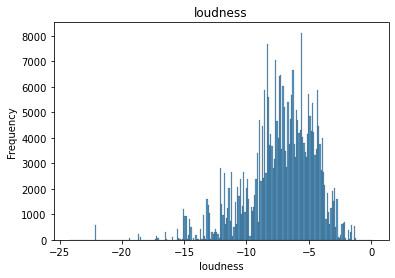

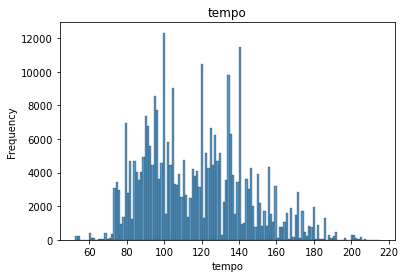

In [48]:
# Visualize histograms of each song metric
for col in ['loudness', 'tempo']:
    sns.histplot(df[col])
    plt.title(col)
    plt.ylabel('Frequency')
    plt.show()


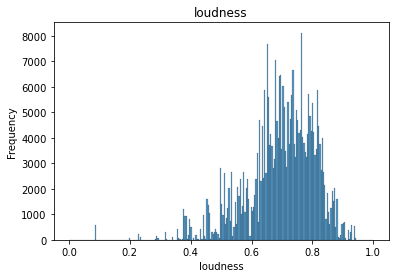

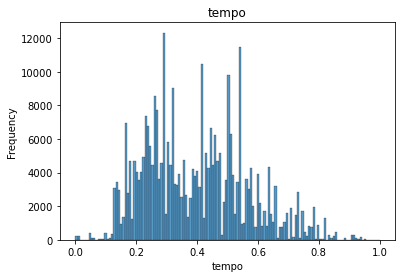

In [49]:
# Visualize histograms of each song metric
for col in ['loudness', 'tempo']:
    sns.histplot(df2[col])
    plt.title(col)
    plt.ylabel('Frequency')
    plt.show()


In [50]:
display(df['loudness'].describe(),df2['loudness'].describe())

count    319553.000000
mean         -7.197913
std           2.753418
min         -24.250000
25%          -8.559000
50%          -6.951000
75%          -5.184000
max           0.175000
Name: loudness, dtype: float64

count    319553.000000
mean          0.698141
std           0.112729
min           0.000000
25%           0.642416
50%           0.708250
75%           0.780594
max           1.000000
Name: loudness, dtype: float64

In [51]:
display(df['tempo'].describe(),df2['tempo'].describe())

count    319553.000000
mean        117.021824
std          27.125149
min          52.572000
25%          95.049000
50%         115.053000
75%         135.902000
max         215.090000
Name: tempo, dtype: float64

count    319553.000000
mean          0.396570
std           0.166906
min           0.000000
25%           0.261368
50%           0.384456
75%           0.512743
max           1.000000
Name: tempo, dtype: float64

### Scatter Plots

In [52]:
#filter songs with above median popularity
df2= df2[df2['popularity']>=61]
df2 = df2.reset_index(drop=True)
len(df2)

204035

In [53]:
df2.head()

,date,position,track_id,track_name,artist,streams,artist_id,artist_name,album_id,duration,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,total_followers,genres
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,...,0.738628,1.0,0.0454,0.196,0.00000,0.0830,0.301,0.748102,30585244,"['dance pop', 'pop']"
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,...,0.689949,1.0,0.0590,0.695,0.00000,0.0902,0.494,0.199799,8035001,"['pop', 'post-teen pop', 'talent show', 'uk pop']"
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,...,0.763603,1.0,0.0338,0.414,0.00000,0.1110,0.661,0.261128,17865117,"['dance pop', 'edm', 'electropop', 'pop', 'pop..."
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,...,0.631689,1.0,0.0307,0.097,0.00272,0.1150,0.296,0.230301,17865117,"['dance pop', 'edm', 'electropop', 'pop', 'pop..."
4,2017-01-01,6,6b8Be6ljOzmkOmFslEb23P,24K Magic,Bruno Mars,123924,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,225983,...,0.817523,1.0,0.0797,0.034,0.00000,0.1530,0.632,0.334720,30585244,"['dance pop', 'pop']"


<AxesSubplot:xlabel='loudness', ylabel='popularity'>

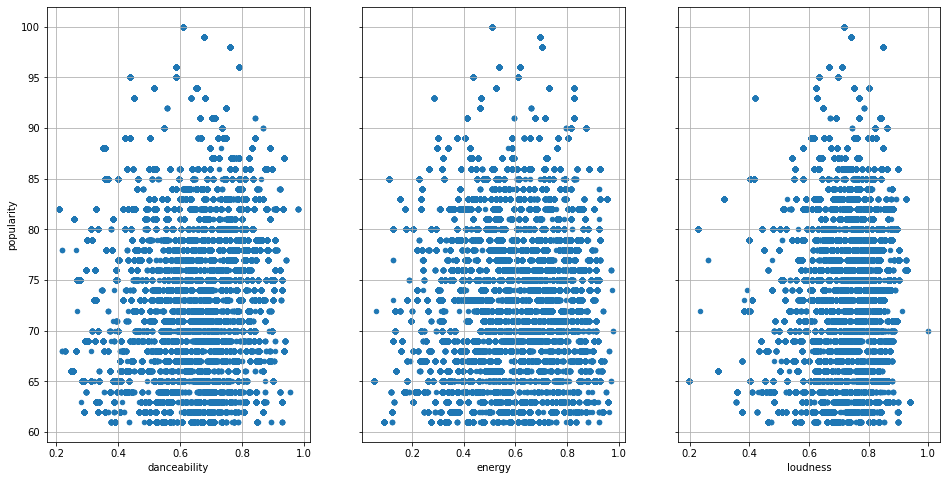

In [54]:
fig, axs = plt.subplots(1, 3, figsize=(16, 8), sharey=True)
df2.plot(kind='scatter', x='danceability', y='popularity', ax=axs[0], grid=True)
df2.plot(kind='scatter', x='energy', y='popularity', ax=axs[1], grid=True)
df2.plot(kind='scatter', x='loudness', y='popularity', ax=axs[2], grid=True)

## Model Fitting Example (Linear Regression)

In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204035 entries, 0 to 204034
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              204035 non-null  object 
 1   position          204035 non-null  int64  
 2   track_id          204035 non-null  object 
 3   track_name        204035 non-null  object 
 4   artist            204035 non-null  object 
 5   streams           204035 non-null  int64  
 6   artist_id         204035 non-null  object 
 7   artist_name       204035 non-null  object 
 8   album_id          204035 non-null  object 
 9   duration          204035 non-null  int64  
 10  release_date      204035 non-null  object 
 11  popularity        204035 non-null  int64  
 12  danceability      203972 non-null  float64
 13  energy            203972 non-null  float64
 14  key               203972 non-null  float64
 15  loudness          203972 non-null  float64
 16  mode              20

In [56]:
df2=df2.dropna()
len(df2)

203972

### Single variable LinReg

In [57]:
from sklearn.linear_model import LinearRegression

feature_cols = ['danceability']
X = df2[feature_cols]
y = df2['popularity']

model = LinearRegression(fit_intercept=True)
model.fit(X,y)

print('Model slope: %0.4f' % model.coef_[0])
print('Model intercept: %0.4f' % model.intercept_)


Model slope: 11.3891
Model intercept: 66.1790


#### Metrics

In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#define RMSE function
def RMSE(model, X, y):
    predicted = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, predicted))
    return rmse
  
#define MAE function
def MAE(model, X, y):
    predicted = model.predict(X)
    mae = mean_absolute_error(y, predicted)
    return mae

#### RMSE and MAE of single variable LinReg

In [59]:
print('Model RMSE: %0.4f' % RMSE(model,X,y))
print('Model MAE: %0.4f' % MAE(model,X,y))

Model RMSE: 7.9374
Model MAE: 6.7966


#### Outlier Checking

In [60]:
q1 = df2['popularity'].quantile(0.25)
q3 =  df2['popularity'].quantile(0.75)
IQR = q3 -q1

outliers = df2[(df2['popularity']<(q1-1.5*IQR))&(df2['popularity']>(q3+1.5*IQR))]['popularity']
outliers

Series([], Name: popularity, dtype: int64)

In [61]:
display(IQR, q1, q3)

14.0

66.0

80.0

In [62]:
display(df2['popularity'].describe())

count    203972.000000
mean         73.306890
std           8.079987
min          61.000000
25%          66.000000
50%          74.000000
75%          80.000000
max         100.000000
Name: popularity, dtype: float64

In [63]:
display(df2.popularity.describe()['75%'] - df2.popularity.describe()['25%'],
        df2.popularity.describe()['25%'],\
        df2.popularity.describe()['75%'])

14.0

66.0

80.0

### MLR -- Mutiple Features

In [64]:
# create X and y
feature_cols = ['danceability', 'energy', 'loudness']
X = df2[feature_cols]
y = df2['popularity']

lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
# pair the feature names with the coefficients
print(list(zip(feature_cols, lm.coef_)))

55.20410258565221
[('danceability', 8.451881146256811), ('energy', 0.5495734466306443), ('loudness', 17.836225179110038)]


In [65]:
# calculate the R-squared
lm.score(X, y)

0.0925490273971682

### K-fold Validation

In [66]:
display(X[:5], y[:5])

,danceability,energy,loudness
0,0.578,0.574,0.738628
1,0.358,0.557,0.689949
2,0.748,0.524,0.763603
3,0.662,0.586,0.631689
4,0.818,0.803,0.817523


0    76
1    85
2    85
3    69
4    79
Name: popularity, dtype: int64

In [67]:
X = X.to_numpy()
Y = y.to_numpy()

In [68]:
from sklearn.model_selection import KFold
#kf = KFold(n_splits=5, random_state=None, shuffle=False)
kf = KFold(n_splits=10, random_state=None, shuffle=False)


for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    print(np.shape(X_train), np.shape(Y_train))
    print(np.shape(X_test), np.shape(Y_test))

    
    #fit using training data
    lin_model = LinearRegression()
    lin_model.fit(X_train, Y_train)
    
    #evaluate fit of train data
    print('train: R2=%0.2f '% lin_model.score(X_train, Y_train))

    #evaluate using test data
    print('test: RMSE=%0.2f, R2=%0.2f' % (RMSE(lin_model, X_test, Y_test), lin_model.score(X_test,Y_test)))

(183574, 3) (183574,)
(20398, 3) (20398,)
train: R2=0.09 
test: RMSE=6.85, R2=0.03
(183574, 3) (183574,)
(20398, 3) (20398,)
train: R2=0.09 
test: RMSE=6.97, R2=0.08
(183575, 3) (183575,)
(20397, 3) (20397,)
train: R2=0.09 
test: RMSE=7.04, R2=0.08
(183575, 3) (183575,)
(20397, 3) (20397,)
train: R2=0.09 
test: RMSE=7.13, R2=0.11
(183575, 3) (183575,)
(20397, 3) (20397,)
train: R2=0.09 
test: RMSE=7.38, R2=0.08
(183575, 3) (183575,)
(20397, 3) (20397,)
train: R2=0.09 
test: RMSE=7.78, R2=0.07
(183575, 3) (183575,)
(20397, 3) (20397,)
train: R2=0.09 
test: RMSE=7.92, R2=0.07
(183575, 3) (183575,)
(20397, 3) (20397,)
train: R2=0.09 
test: RMSE=7.94, R2=0.13
(183575, 3) (183575,)
(20397, 3) (20397,)
train: R2=0.09 
test: RMSE=8.38, R2=0.08
(183575, 3) (183575,)
(20397, 3) (20397,)
train: R2=0.10 
test: RMSE=9.47, R2=-0.00


## Other Models